**Gokul Nair**

 **2018120039**

Experiment 4    Date : 05-09-2020

## **Part A**  : Simple Linear  Regression Analysis and Modeling

In [57]:
#Import Lib
import pandas as pd #Data Frame Analysis
import numpy as np #Mathematical - Linear Alg
import scipy as sp #numerical Analysis
import matplotlib.pyplot as plt #Graphics
import seaborn as sns #Graphical Analysis

In [58]:
#Part A : Simple Linear Regression

In [59]:
#Import DataSet and storing as pandas data frame
df=pd.read_csv("homeprices.csv")
df.shape

(5, 2)

In [60]:
df.columns

Index(['area', 'price'], dtype='object')

In [61]:
#Data preprocessing : Understand the data types
df.dtypes

area     int64
price    int64
dtype: object

In [62]:
#Obesrve Dataset
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [63]:
df.tail()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [64]:
#Simple data Analysis

In [65]:
df.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


In [66]:
df.mean()

area       3280.0
price    626000.0
dtype: float64

In [67]:
#Access the particular column
df.price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [68]:
df.area

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [69]:
type(df.area)

pandas.core.series.Series

In [70]:
#Pandas Data Structure wrt R env. R Vec. R List, R array R factorial R df
#R vector eq Pandas series
df.area

0    2600
1    3000
2    3200
3    3600
4    4000
Name: area, dtype: int64

In [71]:
x=df.area
y=df.price

In [72]:
type(x)

pandas.core.series.Series

In [73]:
type(y)

pandas.core.series.Series

In [74]:
#Regession Concept
#y=f(x), y is single, x is multidimensional x<-single<-Linear
#Regessor :x,y estimates the f() Learning Components:Dataset (x,y), Algorithm and calculates m (regression coef. and intercept c)
#y=m*x+c
#x---> y as x is predictor

In [75]:
#Build the regression model in Python
from sklearn.linear_model import LinearRegression #Sci-kit ML Lib. 
model=LinearRegression()

In [76]:
#Train Model learning Stage
#It is accepting Dataframe
#Traing Time
%%time
x=pd.DataFrame(x)
y=pd.DataFrame(y)
model.fit(x,y) #Fit finc is to trian data

CPU times: user 5.05 ms, sys: 1.14 ms, total: 6.19 ms
Wall time: 21 ms


In [77]:
#m&c
#To understand the model
m=model.coef_

In [78]:
c=model.intercept_

In [79]:
#Predict x=3300sqft y=?(price)
#y=m*x+c
m*3300 +c #Checking pred of Custom value from eqaution

array([[628715.75342466]])

In [80]:
#Model Prediction
#x is predictor multi dimensional
#y=f(x) x=x1,x2,x3,..
model.predict([[3300]]) #Taking Custom Value

array([[628715.75342466]])

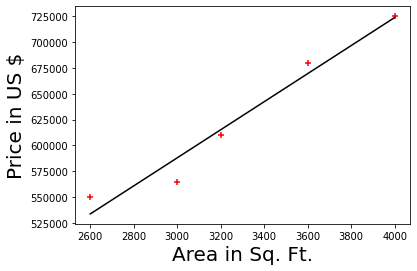

In [81]:
#Best Fitted func
plt.xlabel("Area in Sq. Ft.", fontsize=20)
plt.ylabel("Price in US $", fontsize=20)
plt.scatter(x,y, color='red', marker='+')
plt.plot(df.area,model.predict(df[["area"]]),color='black')

In [82]:
#model is built for some locality
#Forecast the value of some new areas of the locatity
#Impot
newdf=pd.read_csv("areas.csv")

In [83]:
newdf.shape

(13, 1)

In [84]:
pred=model.predict(newdf)

In [85]:
pred

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [86]:
newdf[0:5]

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [87]:
pred[0]

array([316404.10958904])

In [88]:
#export pd.to_csv and for import pd.read_csv
newdf.to_csv("Predicted_new_areas", index=False)

In [89]:
#Part B : Multiple Linear Regreesion

### **Part B : Multiple Regression Analysis and Modeling**

In [90]:
#y=m1*x1+m2*x2+m3*x3+.....+c
df1=pd.read_csv("homeprices-multi.csv")

In [91]:
df1.shape

(6, 4)

In [92]:
df1.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

In [93]:
df1.dtypes

area        int64
bedrooms    int64
age         int64
price       int64
dtype: object

In [94]:
df1.head()

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,4,18,610000
3,3600,3,30,595000
4,4000,5,8,760000


In [95]:
df1.describe()

,area,bedrooms,age,price
count,6.000000,6.000000,6.000000,6.000000
mean,3416.666667,4.166667,16.500000,648333.333333
std,587.934237,1.169045,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.250000,9.750000,572500.000000
50%,3400.000000,4.000000,16.500000,602500.000000
75%,3900.000000,4.750000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


In [96]:
df1.mean()

area          3416.666667
bedrooms         4.166667
age             16.500000
price       648333.333333
dtype: float64

In [97]:
x1=df1[['area','bedrooms','age']]
y1=df1.price

In [98]:
from sklearn.linear_model import LinearRegression #Sci-kit ML Lib. 
model1=LinearRegression()

In [99]:
%%time
x1=pd.DataFrame(x1)
y1=pd.DataFrame(y1)
model1.fit(x1,y1) #Fit finc is to trian data

CPU times: user 4.43 ms, sys: 0 ns, total: 4.43 ms
Wall time: 5.57 ms


In [100]:
c=model1.intercept_

In [101]:
c

array([221323.0018654])

In [102]:
m=model1.coef_

In [103]:
m

array([[  112.06244194, 23388.88007794, -3231.71790863]])

In [104]:
model1.predict([[3000, 3, 10]]) #Taking Custom Value

array([[595359.7888393]])

In [105]:
model1.predict([[100000, 2, 10]]) #Taking Custom Value

array([[11442027.77714843]])

### **Part C : Simple Logistic Classification (binary Classification)**

Breast cancer dataset - create confusion matrix

In [106]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
#Load a dataset
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [135]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [109]:
X=pd.DataFrame(bc.data,columns = bc.feature_names)

In [110]:
X.shape

(569, 30)

In [111]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [112]:
X.describe

<bound method NDFrame.describe of      mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0          17.99         10.38  ...          0.4601                  0.11890
1          20.57         17.77  ...          0.2750                  0.08902
2          19.69         21.25  ...          0.3613                  0.08758
3          11.42         20.38  ...          0.6638                  0.17300
4          20.29         14.34  ...          0.2364                  0.07678
..           ...           ...  ...             ...                      ...
564        21.56         22.39  ...          0.2060                  0.07115
565        20.13         28.25  ...          0.2572                  0.06637
566        16.60         28.08  ...          0.2218                  0.07820
567        20.60         29.33  ...          0.4087                  0.12400
568         7.76         24.54  ...          0.2871                  0.07039

[569 rows x 30 columns]>

In [113]:
bc.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [114]:
bc.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [115]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [116]:
y=pd.DataFrame(bc.target)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [119]:
X_train.shape


(455, 30)

In [120]:
X_test.shape


(114, 30)

In [121]:
y_train.shape


(455, 1)

In [122]:
y_test.shape

(114, 1)

In [123]:
#BUILD LOGISTIC REG MODEL TO CLASSIFY IRIS SPECIES
from sklearn.linear_model import LogisticRegression

In [124]:
logMod=LogisticRegression()

In [125]:
%%time
logMod.fit(X_train,y_train)

CPU times: user 57 ms, sys: 54.3 ms, total: 111 ms
Wall time: 86.9 ms


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
#Model Prediction
ypred=logMod.predict(X_test)

In [127]:
ypred=pd.DataFrame(ypred)


In [128]:
ypred.head()

,0
0,0
1,1
2,1
3,1
4,1


In [129]:
logMod.score(X_test,ypred)

1.0

In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
confusion_matrix(y_test,y_pred=ypred)

array([[45,  2],
       [ 4, 63]])

In [132]:
from sklearn.metrics import classification_report,accuracy_score

In [133]:
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        49
           1       0.94      0.97      0.95        65

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



In [134]:
acc_score = accuracy_score(y_test, ypred)
acc_score

0.9473684210526315